In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paths = ['./Comp_tensor_matmul_vs_torch_matmul_GeForce GTX 1080 Ti.csv',
         './dense_vs_sparse_cpu.csv']
df_dvs_gpu = pd.read_csv(paths[0])
df_dvs_cpu = pd.read_csv(paths[1])

In [3]:
print(list(map(int , list(df_dvs_cpu.index))), df_dvs_cpu.columns)
print(df_dvs_cpu.iloc[:]['256'].values, df_dvs_cpu.columns)

[0, 1, 2, 3, 4] Index(['Unnamed: 0', '256', '512', '1024', '2048', '4096', '8192'], dtype='object')
[0.91727096 0.74590644 0.98686011 1.05452189 1.00520071] Index(['Unnamed: 0', '256', '512', '1024', '2048', '4096', '8192'], dtype='object')


In [4]:
def _plot_dvs_result(df, title = 'GPU', use_log10 = False):
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 22}

    plt.rcParams.update({'font.size': 16})
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    row_names = list(map(int, list(df.index)))
    row_values = [-val for val in row_names]

    # col_names = list(df.columns)
    # col_names.remove('Unnamed: 0')
    col_names = ['256', '512', '2048', '4096']

    for name in col_names:
        yvals = df.iloc[:][name].values
        if use_log10:
            yvals = np.log10(yvals)
        axes.plot(row_values, yvals, label=name)
    
    axes.legend(title='Size(n) of nxn matrix')
    axes.set_title(title)
    axes.set_xlabel(r'$log_{10}$(Density)')
    ylabel = r'$t_{matmul}\ /\ t_{sparse\_mm}$'
    if use_log10:
        ylabel = r'$log_{10}(t_{matmul}\ /\ t_{sparse\_mm})$'
    axes.set_ylabel(ylabel)
    return fig, axes


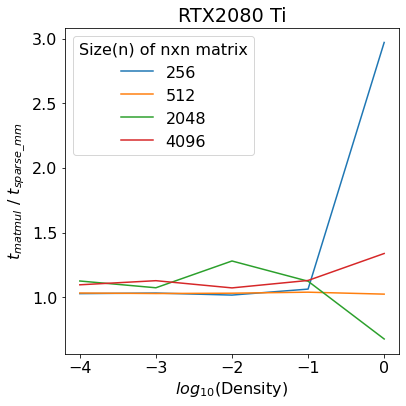

In [5]:
fig, axes = _plot_dvs_result(df_dvs_gpu, 'RTX2080 Ti')

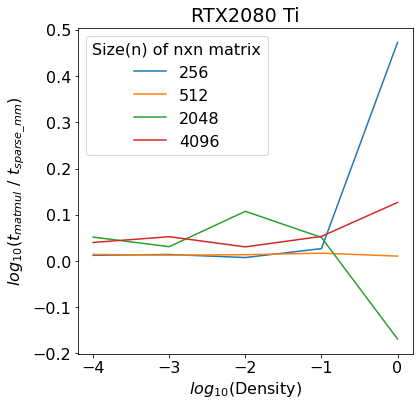

In [6]:
fig, axes = _plot_dvs_result(df_dvs_gpu, 'RTX2080 Ti', True)

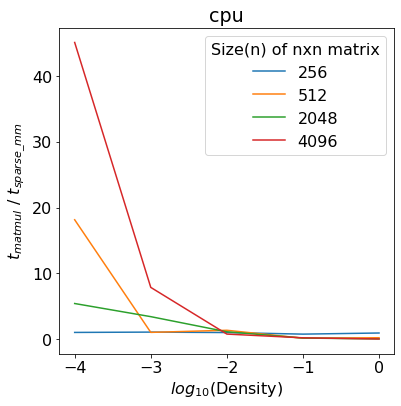

In [82]:
fig, axes = _plot_dvs_result(df_dvs_cpu, 'cpu')

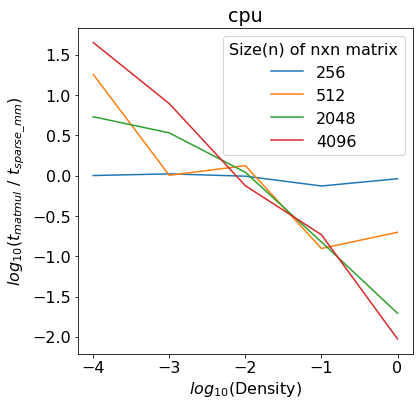

In [84]:
fig, axes = _plot_dvs_result(df_dvs_cpu, 'cpu', True)